# Feature Importance Analysis

Understanding feature contributions in Random Forests.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42)

---
## Load Iris Dataset

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Dataset: {X.shape}')
print(f'Features: {feature_names}')

Dataset: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


---
## Feature Importance with Scikit-Learn

In [3]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print('='*60)
print('FEATURE IMPORTANCE')
print('='*60)
for i in range(len(feature_names)):
    idx = indices[i]
    print(f'{i+1}. {feature_names[idx]:25s}: {importances[idx]:.4f}')

FEATURE IMPORTANCE
1. petal length (cm)        : 0.4453
2. petal width (cm)         : 0.4208
3. sepal length (cm)        : 0.1059
4. sepal width (cm)         : 0.0280


---
## Visualize Feature Importance

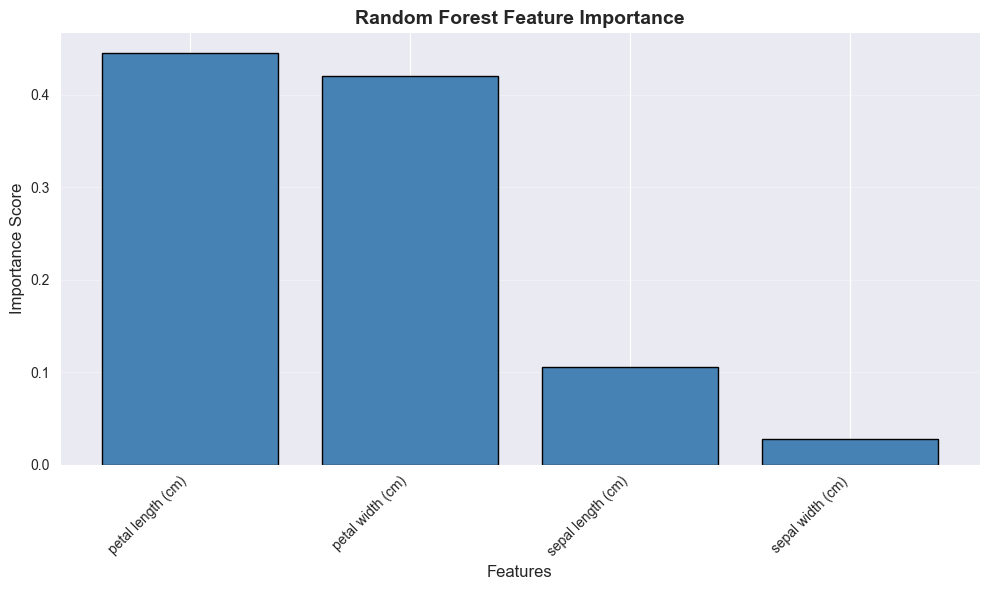

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], color='steelblue', edgecolor='black')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Interpretation

For Iris:
- **Petal measurements** are most important
- They best separate the three species
- Sepal measurements are less discriminative

---
## Synthetic Dataset with Known Importance

In [5]:
n_samples = 1000
X_syn = np.random.randn(n_samples, 5)
y_syn = (3 * X_syn[:, 0] + 2 * X_syn[:, 1] + 0.5 * X_syn[:, 2] + np.random.randn(n_samples) * 0.1)
y_syn = (y_syn > np.median(y_syn)).astype(int)

print('True feature importance (by construction):')
print('Feature 0: HIGH (coef=3.0)')
print('Feature 1: HIGH (coef=2.0)')
print('Feature 2: LOW (coef=0.5)')
print('Feature 3: NONE (noise)')
print('Feature 4: NONE (noise)')

True feature importance (by construction):
Feature 0: HIGH (coef=3.0)
Feature 1: HIGH (coef=2.0)
Feature 2: LOW (coef=0.5)
Feature 3: NONE (noise)
Feature 4: NONE (noise)


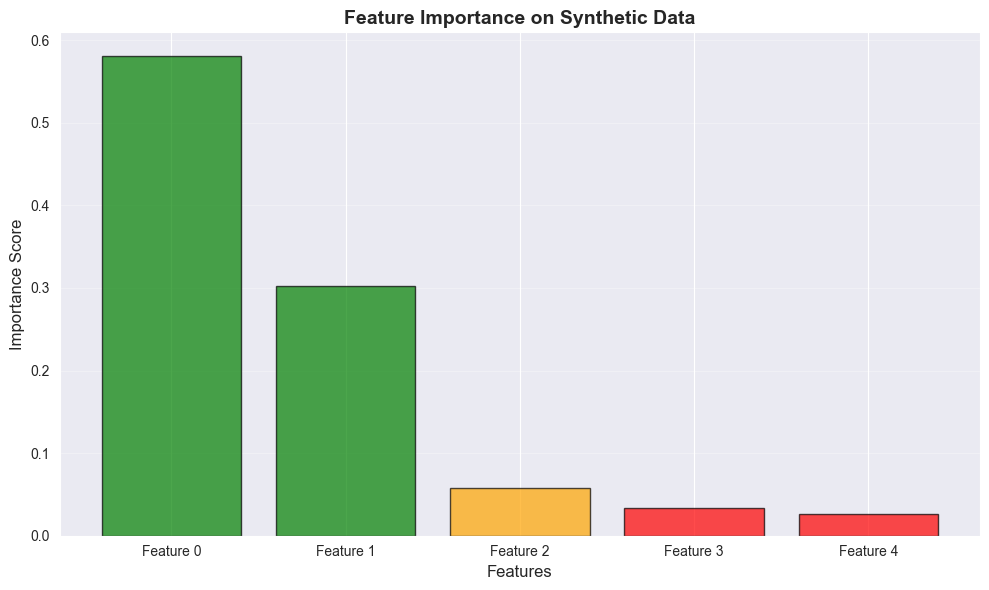


Learned Feature Importance:
Feature 0: 0.5804
Feature 1: 0.3028
Feature 2: 0.0572
Feature 3: 0.0332
Feature 4: 0.0264

Observation: Random Forest correctly identifies important features!


In [6]:
rf_syn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_syn.fit(X_syn, y_syn)
imp_syn = rf_syn.feature_importances_

plt.figure(figsize=(10, 6))
colors = ['green', 'green', 'orange', 'red', 'red']
plt.bar(range(5), imp_syn, color=colors, edgecolor='black', alpha=0.7)
plt.xticks(range(5), [f'Feature {i}' for i in range(5)])
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.title('Feature Importance on Synthetic Data', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('\nLearned Feature Importance:')
for i in range(5):
    print(f'Feature {i}: {imp_syn[i]:.4f}')
print('\nObservation: Random Forest correctly identifies important features!')

---
## Summary

### Feature Importance Benefits:
1. **Feature selection**: Remove unimportant features
2. **Interpretation**: Understand prediction drivers
3. **Domain insight**: Validate assumptions
4. **Debugging**: Identify unexpected patterns

### How It Works:
- **Mean Decrease in Impurity**: Sum impurity reduction across splits
- **Normalized**: Scores sum to 1.0
- **Higher score**: More important

### Key Point:
"Random Forests measure feature importance by tracking how much each feature reduces impurity across all trees. Features that frequently create purer splits are more important for predictions."